In [4]:
!pip install dash
!pip install dash-bootstrap-components

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html, Input, Output
import plotly.express as p
import plotly.express as px

In [6]:
house_df= pd.read_csv('./sample_data/housing_time_series_by_madrid_neighbourhood.csv')

In [7]:
print(house_df.info())

print(house_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  2218 non-null   object 
 1   date                 2218 non-null   object 
 2   m2_price             2218 non-null   float64
 3   inflation            2218 non-null   float64
 4   HICP                 2218 non-null   float64
 5   population_density   2218 non-null   int64  
 6   listings_count       2218 non-null   int64  
 7   minimum_nights       2218 non-null   float64
 8   nigth_price          2218 non-null   float64
 9   availability_365     2218 non-null   float64
 10  listing_reviews      2218 non-null   int64  
 11  number_of_reviews    2218 non-null   float64
 12  reviews_per_month    2218 non-null   float64
 13  hosts_count          2218 non-null   int64  
 14  Private_room         2218 non-null   int64  
 15  Entire_home          2218 non-null   i

In [8]:
print(house_df.columns)


Index(['neighbourhood_group', 'date', 'm2_price', 'inflation', 'HICP',
       'population_density', 'listings_count', 'minimum_nights', 'nigth_price',
       'availability_365', 'listing_reviews', 'number_of_reviews',
       'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home',
       'Hotel_room', 'Shared_room'],
      dtype='object')


Correlacion de variables

                    m2_price  population_density  availability_365  inflation  \
m2_price            1.000000            0.471367          0.063401   0.049589   
population_density  0.471367            1.000000          0.162690   0.136025   
availability_365    0.063401            0.162690          1.000000   0.030185   
inflation           0.049589            0.136025          0.030185   1.000000   
minimum_nights     -0.153499           -0.149692          0.121339  -0.053845   
nigth_price         0.347200            0.073220         -0.000374  -0.011975   
number_of_reviews  -0.025598           -0.267660          0.027684  -0.062931   

                    minimum_nights  nigth_price  number_of_reviews  
m2_price                 -0.153499     0.347200          -0.025598  
population_density       -0.149692     0.073220          -0.267660  
availability_365          0.121339    -0.000374           0.027684  
inflation                -0.053845    -0.011975          -0.062931  
minimu

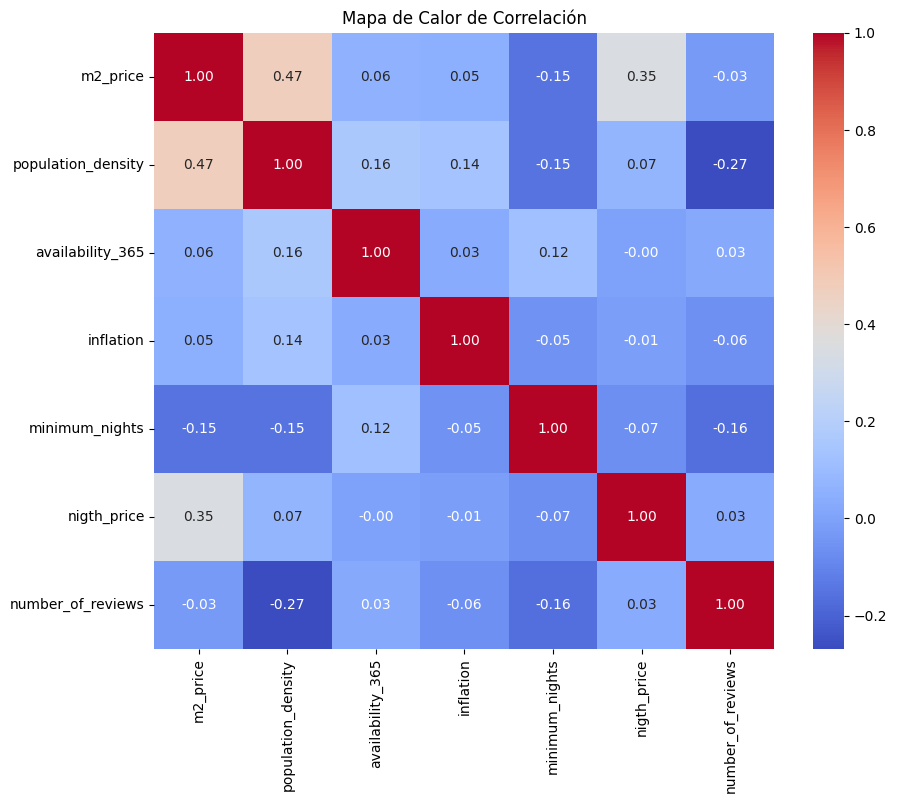

In [9]:
correlation_matrix = house_df[['m2_price', 'population_density', 'availability_365', 'inflation', 'minimum_nights', 'nigth_price', 'number_of_reviews']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

Distribucion de Precio por Metro Cuadrado



In [10]:
fig = px.histogram(house_df, x='m2_price', nbins=20, marginal="box", title='Distribución de Precio por Metro Cuadrado', labels={'m2_price':'Price per m²'})
fig.update_layout(xaxis_title='Precio', yaxis_title='Metros Cuadrados')
fig.show()


¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?


In [11]:
average_price = house_df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()

fig = p.line(average_price, x='date', y='m2_price', color='neighbourhood_group',
             title='Precio Promedio del Metro Cuadrado',
             labels={'m2_price': 'Precio Promedio Metro Cuadrado', 'date': 'Date', 'neighbourhood_group': 'Neighbourhood Group'})
fig.show()

¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?



In [12]:
correlacion = house_df['m2_price'].corr(house_df['population_density'])

fig = px.scatter(house_df, x='population_density', y='m2_price',
                 title='Correlación entre el precio por metro cuadrado y la densidad de la población',
                 labels={'population_density': 'Densidad de Población', 'm2_price': 'Precio por metro cuadrado'},
                 hover_data=['neighbourhood_group', 'date'])

fig.update_layout(
    xaxis_title='Densidad de la Población',
    yaxis_title='Precio por metro cuadrado'
)

fig.show()

¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?

In [13]:
house_df['date'] = pd.to_datetime(house_df['date'])

house_df['year'] = house_df['date'].dt.year

price_growth = house_df.groupby(['year', 'neighbourhood_group'])['m2_price'].mean().reset_index()

price_growth['growth_rate'] = price_growth.groupby('neighbourhood_group')['m2_price'].pct_change() * 100

price_growth_sorted = price_growth.sort_values(by=['growth_rate'], ascending=False)

print(price_growth_sorted.head(10))

fig = p.line(price_growth, x='year', y='growth_rate', color='neighbourhood_group',
             title='Tasa de crecimiento anual del precio por m2 para cada vecindario')
fig.show()

     year neighbourhood_group   m2_price  growth_rate
137  2019          Villaverde  11.216667    15.042735
128  2019              Latina  12.483333    13.916350
177  2022              Centro  18.866667    13.370055
109  2018           Hortaleza  13.025000    13.096961
129  2019           Moratalaz  11.541667    13.061224
119  2018          Villaverde   9.750000    12.716763
197  2023            Chamberí  20.330833    12.584218
135  2019           Vicálvaro  10.983333    12.553373
134  2019               Usera  12.100000    12.383901
130  2019  Puente de Vallecas  12.408333    12.292609


¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?

---



In [14]:
import plotly.graph_objects as go


hosts = house_df.groupby('neighbourhood_group')['hosts_count'].sum().reset_index()
hosts = hosts.sort_values('hosts_count', ascending=False)

print(hosts)

fig = go.Figure(data=[go.Bar(x=hosts['neighbourhood_group'], y=hosts['hosts_count'])])
fig.update_layout(title='Número de anfitriones por vecindario',
                  xaxis_title='Vecindario',
                  yaxis_title='Número de anfitriones',
                  xaxis={'categoryorder':'total descending'})
fig.show()

   neighbourhood_group  hosts_count
3               Centro        93731
0           Arganzuela        11183
12           Salamanca        10644
5             Chamberí         9053
11              Retiro         7563
13              Tetuán         7164
6        Ciudad Lineal         5349
2          Carabanchel         5124
10  Puente de Vallecas         4712
8               Latina         4570
4            Chamartín         4503
7            Hortaleza         3617
14               Usera         2594
1              Barajas         1518
17          Villaverde         1091
9            Moratalaz          948
16   Villa de Vallecas          769
15           Vicálvaro          388


In [15]:
avg_price = house_df.groupby('neighbourhood_group').agg({'m2_price': 'mean', 'hosts_count': 'sum'}).reset_index()

fig = px.scatter(avg_price,
                 x='hosts_count',
                 y='m2_price',
                 size='hosts_count',
                 size_max=30,
                 title='Relación entre el número de anfitriones y el precio de la vivienda',
                 labels={'hosts_count': 'Número de anfitriones', 'm2_price': 'Precio medio por metro cuadrado'},
                 hover_data=['hosts_count', 'm2_price'])


fig.update_layout(
    xaxis_title='Número de anfitriones',
    yaxis_title='Precio medio por m²'
)
fig.show()


Relación entre Night Price y m2 Price

In [16]:
fig = px.scatter(house_df, x='nigth_price', y='m2_price',
                 title='Relación entre Precio por Noche y Precio por m²',
                 labels={'nigth_price': 'Precio por Noche', 'm2_price': 'Precio por m²'},
                 hover_data=['neighbourhood_group', 'date'])

fig.update_layout(
    xaxis_title='Precio por Noche',
    yaxis_title='Precio por m²'
)

fig.show()

correlation_night_m2 = house_df['nigth_price'].corr(house_df['m2_price'])
print(f"Correlación entre el precio por noche y el precio por metro cuadrado: {correlation_night_m2}")

Correlación entre el precio por noche y el precio por metro cuadrado: 0.34720032646942955


Relacion entre population density y number of reviews

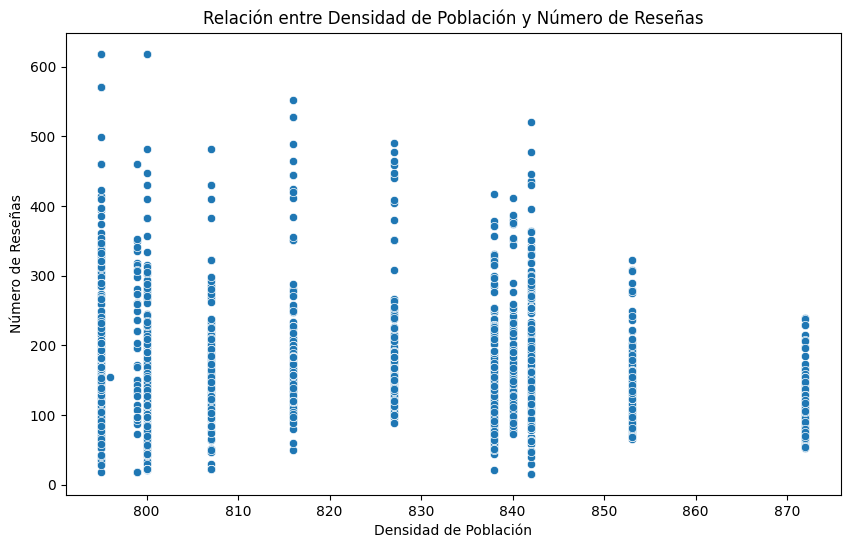

Correlación entre la densidad de población y el número de reseñas: -0.26765968073407687


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_density', y='number_of_reviews', data=house_df)
plt.title('Relación entre Densidad de Población y Número de Reseñas')
plt.xlabel('Densidad de Población')
plt.ylabel('Número de Reseñas')
plt.show()

correlation_pop_reviews = house_df['population_density'].corr(house_df['number_of_reviews'])
print(f"Correlación entre la densidad de población y el número de reseñas: {correlation_pop_reviews}")

Modelo de Regresion Lineal

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

aggregated_data = house_df.groupby('date').agg({
    'm2_price': 'mean',
    'availability_365': 'mean',
    'inflation': 'mean',
    'minimum_nights': 'mean',
    'nigth_price': 'mean',
    'number_of_reviews': 'mean'
}).reset_index()

X = aggregated_data[['availability_365', 'inflation', 'minimum_nights', 'nigth_price', 'number_of_reviews']]
y = aggregated_data['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 0.6699144805483477
Coeficiente de determinación (R^2): 0.5722630382364347


In [19]:
sns.set(style="whitegrid")

In [20]:

app = Dash(__name__)

avg_price_fig = px.line(house_df, x='date', y='m2_price', color='neighbourhood_group', title='Precio Promedio del Metro Cuadrado')

house_fig = px.line(price_growth, x='year', y='growth_rate', color='neighbourhood_group', title='Tasa de crecimiento anual del precio por m2 para cada vecindario')

correlacion_fig = px.scatter(house_df, x='population_density', y='m2_price', color='neighbourhood_group', title='Correlación entre el precio por metro cuadrado y la densidad de la población')

crecimiento_fig = px.line(price_growth,  x='year', y='growth_rate', color='neighbourhood_group', title='Tasa de crecimiento anual del precio por m2 para cada vecindario')

#anfitriones_fig = go.Figure(avg_price, x='neighbourhood_group', y='hosts_count', title='Número de anfitriones por vecindario')

price2_fig = px.scatter(house_df, x='hosts_count', y='m2_price', title='Relación entre el número de anfitriones y el precio de la vivienda', labels={'hosts_count': 'Número de anfitriones', 'm2_price': 'Precio medio por metro cuadrado'})


app.layout = html.Div([
    html.H1("Dashboard Housing Madrid", style={"text-align": "center"}),

    html.Div([
        html.Div(children=[
            html.Label("Precio Promedio del Metro Cuadrado"),
            dcc.Graph(figure=avg_price_fig)
        ]),
        html.Div(children=[
            html.Label("Tasa de crecimiento anual del precio por m2 para cada vecindario"),
            dcc.Graph(figure=house_fig)
        ]),
        html.Div(children=[
            html.Label("Correlación entre el precio por metro cuadrado y la densidad de la población"),
            dcc.Graph(figure=correlacion_fig)
        ]),
        html.Div(children=[
            html.Label("Tasa de crecimiento anual del precio por m2 para cada vecindario"),
            dcc.Graph(figure=crecimiento_fig)
        ]),
        html.Div(children=[
            html.Label("Relación entre el número de anfitriones y el precio de la vivienda"),
            dcc.Graph(figure=price2_fig)
        ])
    ])

])

if __name__ == "__main__":
  app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [26]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Precio Promedio del Metro Cuadrado",
        "Correlación entre el precio por metro cuadrado y la densidad de la población",
        "Tasa de crecimiento anual del precio por m2 para cada vecindario (1)",
        "Tasa de crecimiento anual del precio por m2 para cada vecindario (2)"
    )
)

# First graph (top left)
fig1 = px.line(
    average_price, x='date', y='m2_price', color='neighbourhood_group',
    labels={'m2_price': 'Precio Promedio Metro Cuadrado', 'date': 'Fecha', 'neighbourhood_group': 'Grupo Vecindario'}
)
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Second graph (top right)
fig2 = px.scatter(
    house_df, x='population_density', y='m2_price',
    labels={'population_density': 'Densidad de Población', 'm2_price': 'Precio por metro cuadrado'},
    hover_data=['neighbourhood_group', 'date']
)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Third graph (bottom left)
fig3 = px.line(
    price_growth, x='year', y='growth_rate', color='neighbourhood_group',
    labels={'growth_rate': 'Tasa de Crecimiento', 'year': 'Año', 'neighbourhood_group': 'Grupo Vecindario'}
)
for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)

# Fourth graph (bottom right)
fig4 = px.scatter(house_df, x='nigth_price', y='m2_price',
                 title='Relación entre Precio por Noche y Precio por m²',
                 labels={'nigth_price': 'Precio por Noche', 'm2_price': 'Precio por m²'},
                 hover_data=['neighbourhood_group', 'date']
)

for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)


fig.update_layout(
    height=800, width=1800,
    title_text="Dashboard Housing Madrid",
    showlegend=False
)

fig.show()
